# How is time handled under `plm()`?

In [2]:
library(plm)
dataPanel101 <- read.csv("https://github.com/ds777/sample-datasets/blob/master/dataPanel101.csv?raw=true")
head(dataPanel101)

country year y           y_bin x1        x2         x3          opinion  
1 A       1990  1342787840 1     0.2779037 -1.1079559  0.28255358 Str agree
2 A       1991 -1899660544 0     0.3206847 -0.9487200  0.49253848 Disag    
3 A       1992   -11234363 0     0.3634657 -0.7894840  0.70252335 Disag    
4 A       1993  2645775360 1     0.2461440 -0.8855330 -0.09439092 Disag    
5 A       1994  3008334848 1     0.4246230 -0.7297683  0.94613063 Disag    
6 A       1995  3229574144 1     0.4772141 -0.7232460  1.02968040 Str agree

In [4]:
m1 = lm(y~x1+x2+x3, data=dataPanel101) # Simple lm
summary(m1)


Call:
lm(formula = y ~ x1 + x2 + x3, data = dataPanel101)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.502e+09 -1.624e+09  1.737e+08  1.498e+09  7.356e+09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.401e+09  7.624e+08   1.837   0.0707 .
x1          5.591e+08  9.156e+08   0.611   0.5436  
x2          8.745e+07  3.495e+08   0.250   0.8032  
x3          9.262e+07  2.937e+08   0.315   0.7534  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.071e+09 on 66 degrees of freedom
Multiple R-squared:  0.007624,	Adjusted R-squared:  -0.03748 
F-statistic: 0.169 on 3 and 66 DF,  p-value: 0.9169


In [5]:
m2 = lm(y~x1+x2+x3+year, data=dataPanel101) # Year as covariate
summary(m2)


Call:
lm(formula = y ~ x1 + x2 + x3 + year, data = dataPanel101)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.686e+09 -1.704e+09  3.875e+08  1.428e+09  7.373e+09 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -3.189e+11  2.692e+11  -1.185    0.241
x1           2.829e+08  9.418e+08   0.300    0.765
x2          -3.840e+06  3.567e+08  -0.011    0.991
x3           5.207e+06  3.018e+08   0.017    0.986
year         1.607e+08  1.351e+08   1.190    0.238

Residual standard error: 3.062e+09 on 65 degrees of freedom
Multiple R-squared:  0.02877,	Adjusted R-squared:  -0.03099 
F-statistic: 0.4814 on 4 and 65 DF,  p-value: 0.7493


In [6]:
m3 = lm(y~x1+x2+x3+factor(year), data=dataPanel101) # Year as fixed effect
summary(m3)


Call:
lm(formula = y ~ x1 + x2 + x3 + factor(year), data = dataPanel101)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.299e+09 -1.514e+09  6.900e+07  1.404e+09  7.317e+09 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)         3826844 1187669848   0.003   0.9974  
x1               -410939906  988194965  -0.416   0.6791  
x2                -44395116  352520751  -0.126   0.9002  
x3                192675736  302051729   0.638   0.5261  
factor(year)1991  709898656 1614906400   0.440   0.6619  
factor(year)1992  819852514 1636972591   0.501   0.6184  
factor(year)1993 3357643849 1615207372   2.079   0.0422 *
factor(year)1994 3955528888 1707747974   2.316   0.0242 *
factor(year)1995 1709319338 1646424335   1.038   0.3036  
factor(year)1996 2610433150 1685001493   1.549   0.1269  
factor(year)1997 3934476225 1680896548   2.341   0.0228 *
factor(year)1998 1049945902 1668860160   0.629   0.5318  
factor(year)1999 1519777332 16550

In [9]:
pm3 = plm(y~x1+x2+x3, data=dataPanel101, index="year", model = "pooling", effect="time")
summary(pm3)

Pooling Model

Call:
plm(formula = y ~ x1 + x2 + x3, data = dataPanel101, effect = "time", 
    model = "pooling", index = "year")

Balanced Panel: n = 10, T = 7, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-9.50e+09 -1.62e+09  1.74e+08  0.00e+00  1.50e+09  7.36e+09 

Coefficients:
              Estimate Std. Error t-value Pr(>|t|)  
(Intercept) 1400527699  762362573  1.8371   0.0707 .
x1           559063904  915594364  0.6106   0.5436  
x2            87445757  349461179  0.2502   0.8032  
x3            92622348  293654990  0.3154   0.7534  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    6.2729e+20
Residual Sum of Squares: 6.2251e+20
R-Squared:      0.0076238
Adj. R-Squared: -0.037484
F-statistic: 0.169012 on 3 and 66 DF, p-value: 0.91693

In [10]:
pm4 = plm(y~x1+x2+x3, data=dataPanel101, index="year", model = "within", effect="time")
summary(pm4)

Oneway (time) effect Within Model

Call:
plm(formula = y ~ x1 + x2 + x3, data = dataPanel101, effect = "time", 
    model = "within", index = "year")

Balanced Panel: n = 10, T = 7, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.31e+09 -1.12e+09  5.02e+08  0.00e+00  1.37e+09  6.31e+09 

Coefficients:
     Estimate Std. Error t-value Pr(>|t|)  
x1 2424529066 1156516254  2.0964  0.04027 *
x2 1822699861 2028056028  0.8987  0.37238  
x3  309718336  368552484  0.8404  0.40404  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    5.2364e+20
Residual Sum of Squares: 4.708e+20
R-Squared:      0.10092
Adj. R-Squared: -0.033937
F-statistic: 2.24507 on 3 and 60 DF, p-value: 0.092235

In [11]:
plmtest(pm4, effect="time")


	Lagrange Multiplier Test - time effects (Honda) for balanced panels

data:  y ~ x1 + x2 + x3
normal = 1.7534, p-value = 0.03976
alternative hypothesis: significant effects


In [12]:
pFtest(pm4, pm3) # Inconsistent...


	F test for time effects

data:  y ~ x1 + x2 + x3
F = 3.2225, df1 = 6, df2 = 60, p-value = 0.008242
alternative hypothesis: significant effects


Warning message in meanx * beta:
“longer object length is not a multiple of shorter object length”

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


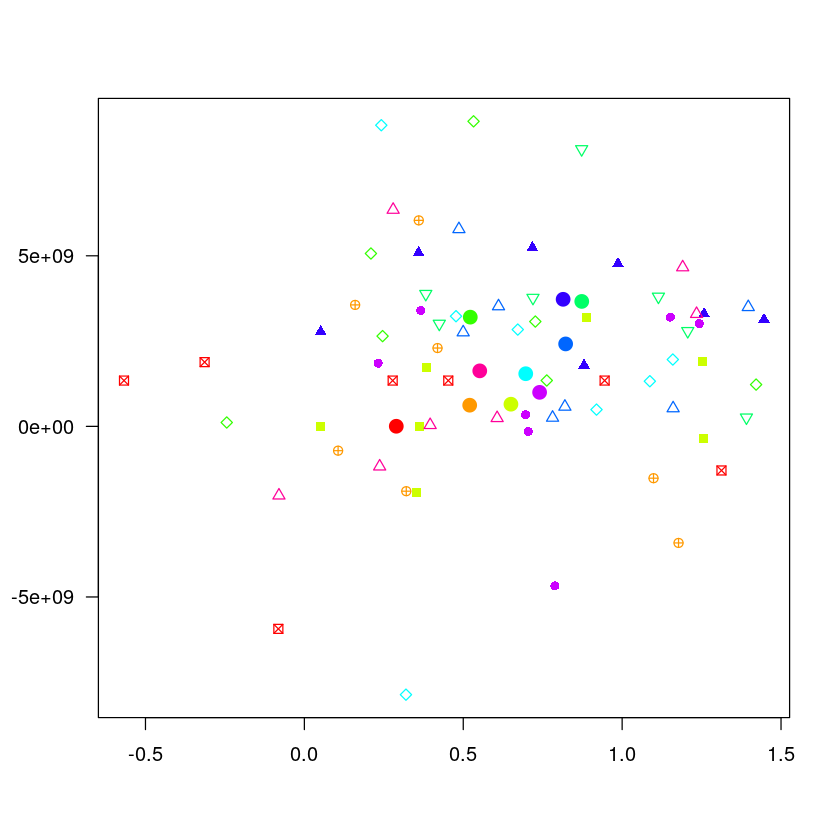

In [16]:
plot(pm4)

In [18]:
pm4$model

y           x1          x2         x3         
1   1342787840  0.27790365 -1.1079559  0.28255358
2  -5934699520 -0.08184998  1.4251202  0.02342812
3  -1292379264  1.31256070 -1.2931356  0.20408297
4   1883025152 -0.31391269  1.7366557  0.64663702
5   1342787840  0.45286715  1.7284026  0.59705788
6   1342787840 -0.56757486 -0.3466710  1.25841930
7   1342787840  0.94488174 -1.5150151  1.45265730
8  -1899660544  0.32068470 -0.9487200  0.49253848
9   -711623744  0.10616001  1.6496018  0.26036251
10 -3415966464  1.17748360 -1.3442180  0.28397188
11  6037768704  0.36009100  2.1318641  1.09994170
12  2296009472  0.41904032  1.7068400  0.79313534
13  3560401920  0.15974578 -0.4641182  0.32665297
14 -1518985728  1.09872830 -1.4614717  1.43964470
15   -11234363  0.36346573 -0.7894840  0.70252335
16 -1933116160  0.35378519  1.5937191 -0.23439877
17  -355804672  1.25640800 -1.2599510  0.37339270
18    10244189  0.05188770  1.6816775  0.96976823
19  1737627776  0.38521346  1.6852775  0.98921281
20  3192281088  0.88706642 -0.5815655 -0.60511333
21  1912769920  1.25257490 -1.4079282  1.42663200
22  2645775360  0.24614404 -0.8855330 -0.09439092
23  3072741632  0.72677696  1.6917576  0.25622433
24  1225180032  1.42154460 -1.3117452 -0.37596563
25  5067265024  0.20944354  1.6149769 -0.21257821
26   113973136 -0.24428773  1.6492835  1.22413280
27  8941232128  0.53241795 -0.7553238 -0.51157588
28  1345690240  0.76276451 -1.3519315  1.85448630
29  3008334848  0.42462304 -0.7297683  0.94613063
30  3768078848  0.71939486  1.7414261  0.41174951
⋮  ⋮           ⋮           ⋮          ⋮          
41   491740096  0.91935229 -0.3697441 -0.01292755
42  1323696384  1.08718650 -1.4098167  2.82980850
43  2756754176  0.49980500 -0.7815716  1.09228810
44   577199360  0.81985730  1.5324961 -0.49964902
45   530576672  1.16045430 -1.2350063  0.81689382
46  5782000128  0.48636678  1.7423391 -0.03731453
47  3520491520  0.61097682  1.4845277 -0.97895509
48  3497164544  1.39689230 -0.3601406  0.67867643
49   254524176  0.78107548 -1.3279996  4.27822400
50  2771810560  0.05162839 -0.7048455  1.41590080
51  1786851584  0.88016719  1.5021962 -0.57626772
52  3128852224  1.44641160 -1.3275964 -0.14206907
53  5090524160  0.35942599  1.8742865  0.08786795
54  5234565120  0.71761495  1.5544620 -0.98863661
55  4764803072  0.98688608 -0.3590902  0.24226174
56  3297033216  1.25787950 -1.5773667  4.58732560
57  3397338880  0.36641079 -0.6983712  1.54872270
58  -149072048  0.70451611  1.4236463 -0.44841924
59  3201045760  1.15162670 -1.2061129  1.19458140
60  1850565248  0.23220351  1.5953021  0.07247547
61   344746176  0.69613826  1.7010406 -0.08965246
62 -4671723520  0.78830910 -0.7556524  0.73347801
63  3011820800  1.24277660 -1.6012177  6.11376190
64    39770336  0.39584252 -0.6431540  1.79419800
65 -1174480128  0.23696731  1.4545859 -0.04936399
66  4663067648  1.19054410 -1.1266172  1.67016040
67 -2025476864 -0.07998896  1.7047973  0.55843300
68   243920688  0.60662067  1.6119040 -0.08929884
69  6349319168  0.27938697 -0.4601679  1.17317200
70  3296283392  1.23420020 -1.6217614  7.16892190

In [21]:
pm4f = fitted(pm4)

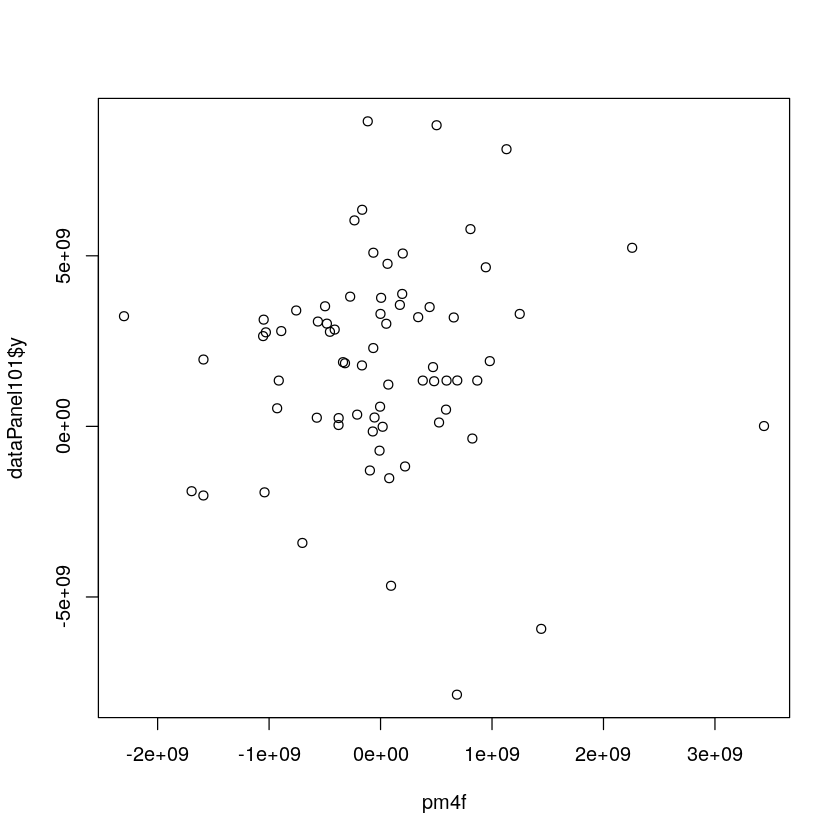

In [22]:
plot(dataPanel101$y~pm4f)

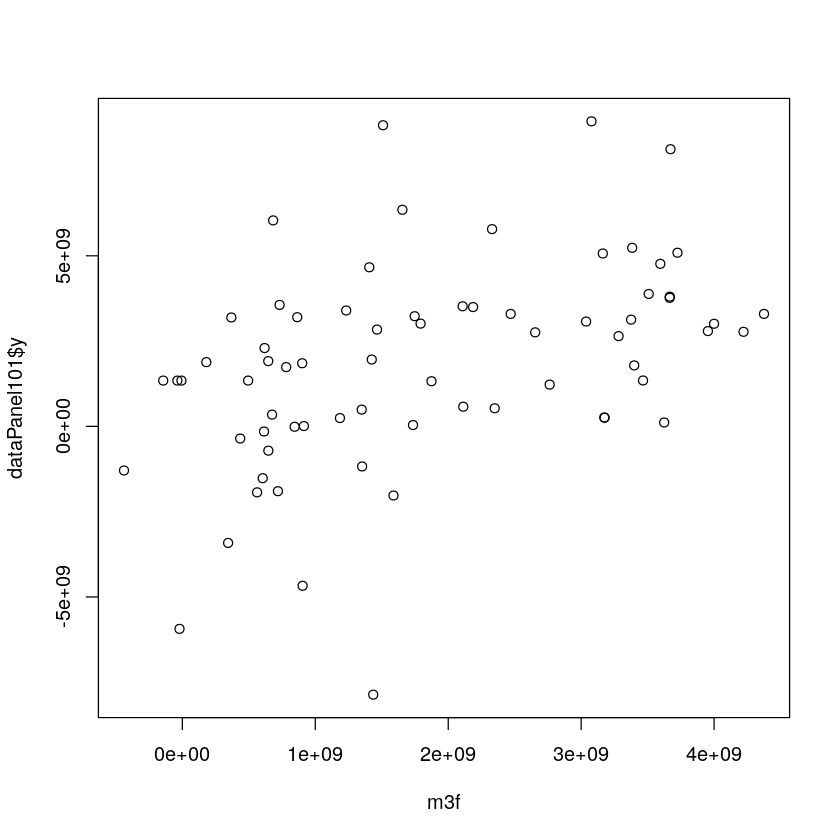

In [25]:
m3f = fitted(m3)
plot(dataPanel101$y~m3f)

In [26]:
pm5 = plm(y~x1+x2+x3, data=dataPanel101, index="year", model = "random", effect="time") # Random effects
summary(pm5) # Pretty bad

Oneway (time) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = y ~ x1 + x2 + x3, data = dataPanel101, effect = "time", 
    model = "random", index = "year")

Balanced Panel: n = 10, T = 7, N = 70

Effects:
                    var   std.dev share
idiosyncratic 7.847e+18 2.801e+09 0.815
time          1.780e+18 1.334e+09 0.185
theta: 0.4469

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.67e+09 -1.39e+09  1.14e+08  0.00e+00  1.69e+09  7.01e+09 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)  
(Intercept)  492524239  962576200  0.5117  0.60888  
x1          1734069353  999303735  1.7353  0.08269 .
x2           420030519  497228769  0.8447  0.39825  
x3           226606955  324458564  0.6984  0.48492  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    5.5536e+20
Residual Sum of Squares: 5.2872e+20
R-Squared:      0.047967
Adj. R-Squared: 0.0046933
Chisq: 3.32536 on 3 